$$
\newcommand{\bx}{\mathbf{x}}
\newcommand{\bv}{\mathbf{v}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\bz}{\mathbf{z}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\V}{\mathbb{V}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\calN}{\mathcal{N}}
$$

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="white", color_codes=True)

np.random.seed(42)

## Definition

$\textbf{Covariance}$ of two random variables x and y is defined as

$$ cov(x, y) = \E[(x-\E[x])(y-\E[y])] $$

Intuitively it measures joint variability of the two rvs; positive covariance means as one variable increases, so does the other (on average).

A $\textbf{covariance matrix} $ $\Sigma$ is then a matrix holding covariances between individual elements of a vector-valued random variable $\bx \in \R^D$. Let $\mu = \E[\bx]$, 

$$ \Sigma = \E[(\bx - \mu)(\bx - \mu)^T] = \E[\bx \bx^T] - \mu \mu^T \Rightarrow \Sigma_{i, j} = \E[x_i x_j] - \mu_i \mu_j = \sigma_{i, j}$$

Without loss of generality we now assume $\mu = \mathbf{0}$.

Two important properties of the covariance matrix are:

$\textbf{Symmetric}$

$$ \sigma_{i, j} = \E[x_i x_j] = \E[x_j x_i] = \sigma_{j, i} $$

$\textbf{Positive semi-definite}$

$$ \bz^T \Sigma \bz = \bz^T \E[\bx \bx^T] \bz = \E[\bz^T \bx \bx^T \bz] = \E[(\bx^T \bz)^T(\bx^T \bz)] = \E[(\bx^T \bz)^2] \geq 0$$

We will make use of these properties later.

$\textbf{Variance}$ of a random variable is then self-covariance, i.e.

$$ \V[x] = cov(x, x) = \E[(x - \E[x])^2] $$

## Examples using Gaussian data

The empirical covariance matrix for dataset X of N vectors can conveniently be estimated as 

$$ C = \frac{1}{N} \sum_i^N \bx_i \bx_i^T = \frac{1}{N} A^T A $$

In [18]:
def covariance_matrix(A):
    assert len(A.shape) == 2
    N, _ = A.shape
    mu = np.mean(A, axis=0)
    return A.T @ A / (N-1) - np.outer(mu, mu)

In [19]:
def variance(x):
    assert len(x.shape) <= 1
    x = np.ravel(x)
    return np.var(x)

In [20]:
def scatter_plot_with_marginals(A):
    g = sns.JointGrid(x=A[:, 0], y=A[:, 1])
    g = g.plot_joint(plt.scatter, color="orange")
    g.ax_marg_x.hist(A[:, 0], color="b", alpha=1) 
    g.ax_marg_y.hist(A[:, 1], color="r", alpha=1, orientation="horizontal")
    plt.show()

### Uncorrelated

In [21]:
x = np.random.normal(0, 1, 200)
y = np.random.normal(0, 1, 200)
A = np.array([x, y]).T
A -= np.mean(A, axis=0)
N, K = A.shape

In [22]:
covariance_matrix(A)

array([[0.86676829, 0.0874307 ],
       [0.0874307 , 0.97417652]])

As expected, the two variables x and y are uncorrelated. We can visualise this with a scatter plot as well.

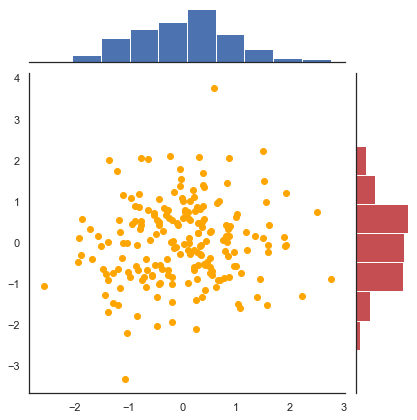

In [23]:
scatter_plot_with_marginals(A)

### Correlated

In [24]:
x = np.random.normal(0, 1, 200)
y = x + np.random.normal(0, 1, 200) / 2
A = np.array([x, y]).T
A -= np.mean(A, axis=0)
N, K = A.shape

In [25]:
C = covariance_matrix(A)
C

array([[0.98811945, 1.04181419],
       [1.04181419, 1.35539189]])

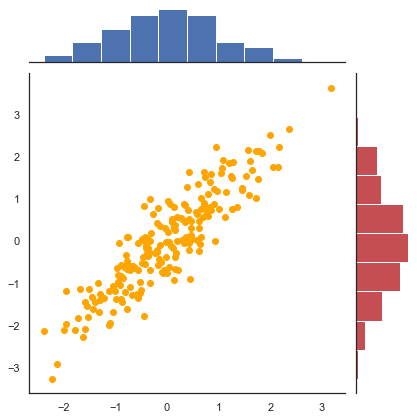

In [26]:
scatter_plot_with_marginals(A)

## Directions of maximum variance

In [27]:
def eigendecompose(A):
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    order = eigenvalues.argsort()[::-1]
    return eigenvalues[order], eigenvectors[:, order]

In [28]:
eigenvalues, eigenvectors = eigendecompose(C)

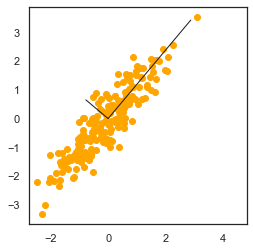

In [29]:
plt.scatter(x, y, color="orange")
plt.axis('square')
for e, v in zip(eigenvalues, eigenvectors.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], 
             [0, 3*np.sqrt(e)*v[1]], 
             'k-', lw=1)
plt.show()

We can project onto the direction of maximal variance, given by the eigenvector associated with the largest eigenvalue. This is the essence of PCA.

Projected variance: 2.22
Variance via eigendecomposition: 2.23
Variance from eigenvalue: 2.23


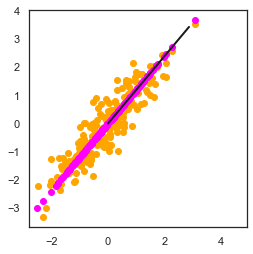

In [30]:
max_E, max_V = eigenvalues[0], eigenvectors[:, 0]

Z = A @ max_V
print("Projected variance: {:.2f}".format(variance(Z)))
print("Variance via eigendecomposition: {:.2f}".format(max_V @ C @ max_V))
print("Variance from eigenvalue: {:.2f}".format(max_E))
plt.scatter(x, y, color="orange")
plt.scatter(Z * max_V[0], Z * max_V[1], color="magenta")
plt.axis('square')
plt.plot([0, 3*np.sqrt(max_E)*max_V[0]], 
         [0, 3*np.sqrt(max_E)*max_V[1]], 
         'k-', lw=2)
plt.show()

Similarly, we can also project onto the other eigenvector, giving a substantially smaller variance.

Projected variance: 0.11
Variance via eigendecomposition: 0.11
Variance from eigenvalue: 0.11


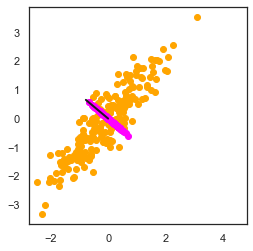

In [31]:
max_E, max_V = eigenvalues[1], eigenvectors[:, 1]

Z = A @ max_V
print("Projected variance: {:.2f}".format(variance(Z)))
print("Variance via eigendecomposition: {:.2f}".format(max_V @ C @ max_V))
print("Variance from eigenvalue: {:.2f}".format(max_E))
plt.scatter(x, y, color="orange")
plt.scatter(Z * max_V[0], Z * max_V[1], color="magenta")
plt.axis('square')
plt.plot([0, 3*np.sqrt(max_E)*max_V[0]], 
         [0, 3*np.sqrt(max_E)*max_V[1]], 
         'k-', lw=2)
plt.show()

Lastly, variance along an arbitrary direction $\bv$:

Projected variance: 1.57
Predicted variance: 1.58


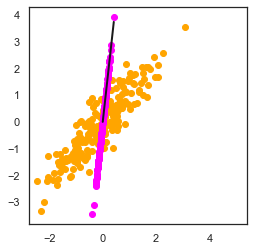

In [32]:
v = 0.6 * eigenvectors[:, 0] + 0.4 * eigenvectors[:, 1]
v /= np.linalg.norm(v)

Z = A @ v
print("Projected variance: {:.2f}".format(variance(Z)))
print("Predicted variance: {:.2f}".format(v @ C @ v))
plt.scatter(x, y, color="orange")
plt.scatter(Z * v[0], Z * v[1], color="magenta")
plt.axis('square')
plt.plot([0, 3*np.sqrt(variance(Z))*v[0]], 
         [0, 3*np.sqrt(variance(Z))*v[1]], 
         'k-', lw=2)
plt.show()

### Obtaining eigenvectors through SVD

A more numerically stable approach to eigendecomposing the covariance matrix is to use singular value decomposition of the data matrix. We write

$$ A = U S V^T \Rightarrow C = A^TA = (USV^T)^T(USV^T) = VS^2V^T $$

In [33]:
U, S_flat, Vt = np.linalg.svd(A)
S = np.zeros_like(A)
S[np.arange(A.shape[1]), np.arange(A.shape[1])] = S_flat

In [34]:
eigenvectors

array([[ 0.64281033, -0.76602538],
       [ 0.76602538,  0.64281033]])

In [35]:
-Vt

array([[-0.64281033, -0.76602538],
       [ 0.76602538, -0.64281033]])

In [36]:
np.allclose(eigenvectors, Vt.T) | np.allclose(eigenvectors, -Vt.T)

True

We can also accomplish the same with the thin SVD output.

In [37]:
U_K, S_flat_K, Vt_K = np.linalg.svd(A, full_matrices=False)

In [38]:
np.allclose(eigenvectors, Vt_K.T) | np.allclose(eigenvectors, -Vt_K.T)

True

## Decorrelation and Whitening

A useful preprocessing step is to decorrelate the individual components of our data, and scale them to have unit variance (whiten). We seek a transformation matrix M such that the transformed data matrix will have identity covariance.

$$ B = AM \quad \textrm{s.t.} \quad B^TB = I $$

First, we write 

$$ B^TB = (AM)^T(AM) = M^T A^TA M = M^T C M $$

Now, since our covariance matrix is symmetric, by spectral theorem it is diagonalisable, with eigenvectors forming an orthonormal basis, i.e.

$$ C = QLQ^T = Q \sqrt{L} I \sqrt{L} Q^T \Rightarrow I = (Q L^{-1/2}) ^{-1} C (Q L^{-1/2}) $$

therefore $M = QL^{-1/2}$.

In [39]:
Y = A @ eigenvectors @ np.diag(1 / np.sqrt(eigenvalues))

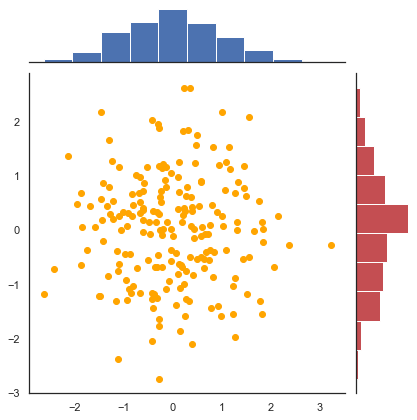

In [40]:
scatter_plot_with_marginals(Y)

In [41]:
Y.T @ Y / (N - 1)

array([[1.00000000e+00, 4.90184287e-17],
       [4.90184287e-17, 1.00000000e+00]])

Repeating above instead using the SVD of X.

\begin{align}
    M^TA^TAM = M^T VSU^TUSV^TM = M^TVS^TSV^TM = I \Rightarrow M = VS^{-1}
\end{align}

In [42]:
Y_SVD = A @ Vt.T @ np.diag(1. / S_flat) * np.sqrt(N-1)

In [43]:
Y_SVD.T @ Y_SVD / (N - 1)

array([[ 1.00000000e+00, -5.97022878e-16],
       [-5.97022878e-16,  1.00000000e+00]])

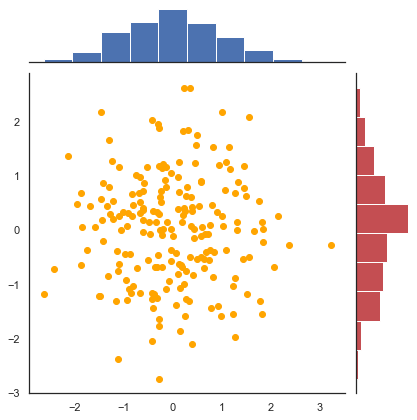

In [44]:
scatter_plot_with_marginals(Y_SVD)